In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
import joblib
     


In [2]:
warnings.filterwarnings('ignore')
     

Data import & Description 

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
print(f'The bean classes are {df["""Class"""].unique()}')
     

The bean classes are ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


# Data preprocessing

Duplicates dropping


In [7]:
df.drop_duplicates(inplace=True)

# Null data

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# Balancing the dataset: SMOTE

In [9]:
#Notice how unbalanced is the dataset:

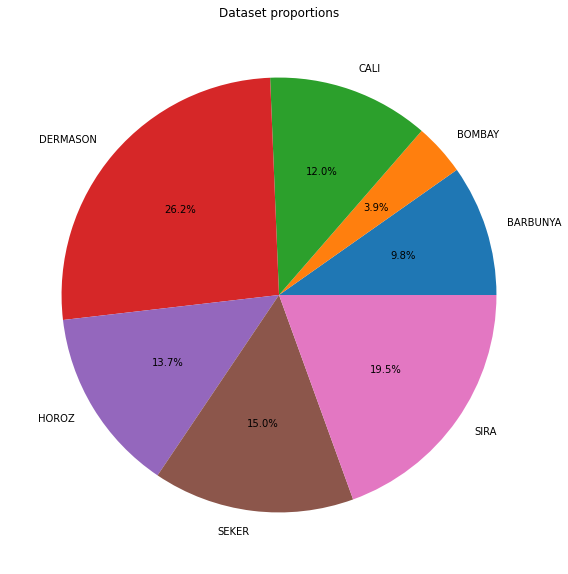

In [10]:
labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [11]:
sm = SMOTE(random_state=42)

In [12]:
X = df.drop('Class', axis=1)
y = df.Class
     

In [13]:
X_sm, y_sm = sm.fit_resample(X, y)

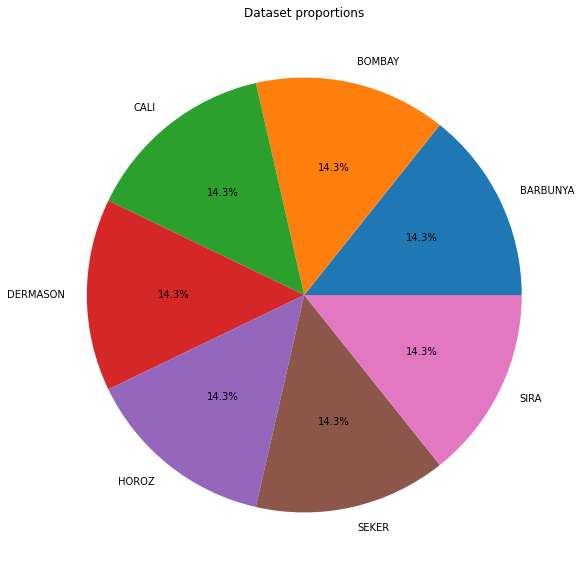

In [14]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

# One-Hot-Encoding

In [15]:

list(np.unique(y_sm))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [16]:
y_sm.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y_sm)))])

0        5
1        5
2        5
3        5
4        5
        ..
24817    6
24818    6
24819    6
24820    6
24821    6
Name: Class, Length: 24822, dtype: int64

# Drop over correlated features

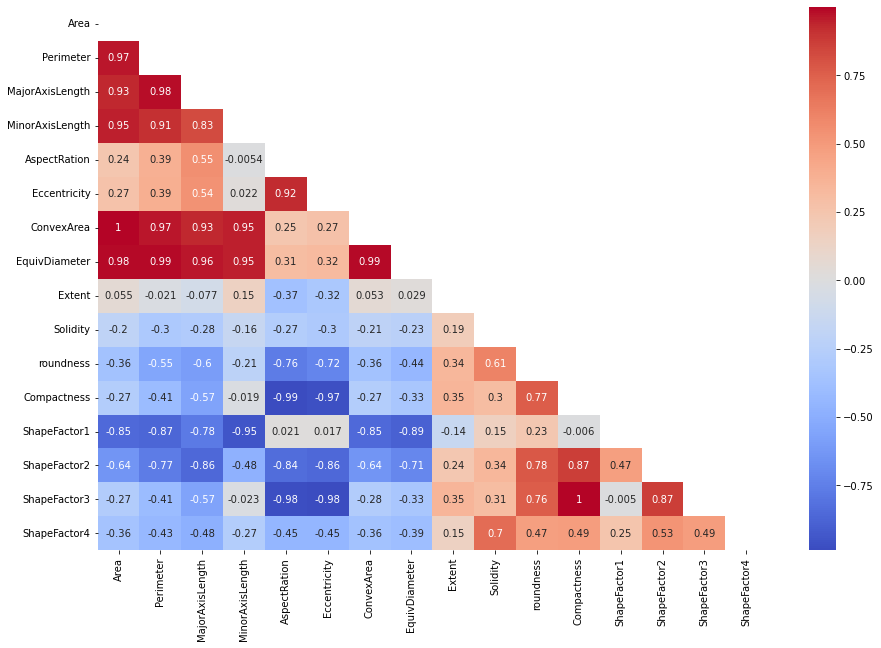

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()), annot=True)
plt.show()

In [18]:
#We observe that ConvexArea is deeply correlated with Area, Perimeter, MajorAxisLength and MinorAxisLength. EquivDiameter is also over correlated with several features. So we will drop both features.

In [19]:

X_sm.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

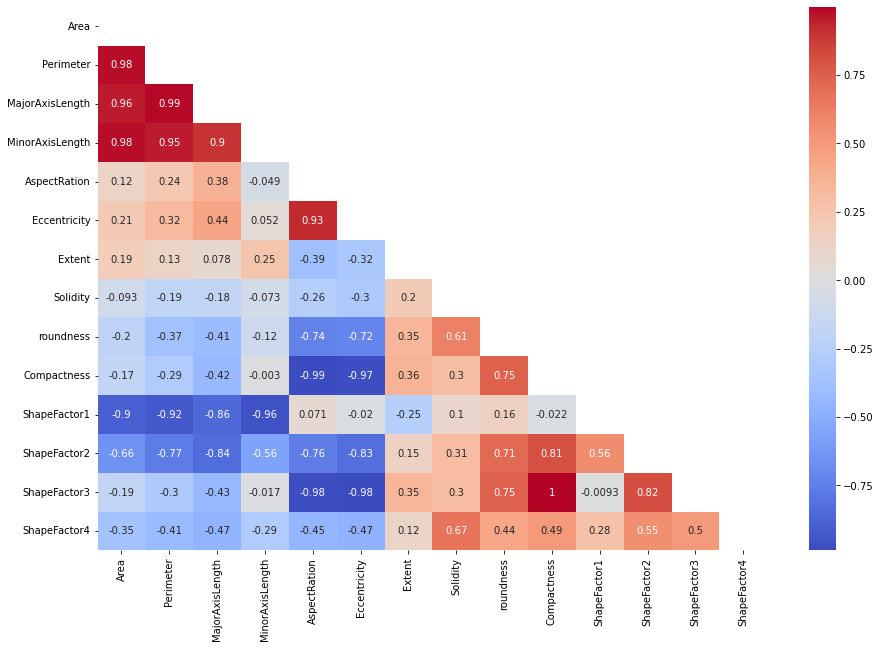

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=X_sm.corr(), cmap='coolwarm', mask=np.triu(X_sm.corr()), annot=True)
plt.show()

# Data split & normalization

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, shuffle=True, test_size=0.2)
     

In [22]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.54390397, -0.42150986, -0.07523552, ..., -0.86584636,
        -1.86808848,  0.508622  ],
       [-0.8230652 , -0.99970786, -1.07668346, ...,  1.26560579,
         0.73586588,  0.43100747],
       [-0.56911811, -0.64111116, -0.62289708, ...,  0.35389758,
         0.16934322,  0.60929323],
       ...,
       [ 2.58162709,  2.29821874,  2.26247548, ..., -1.22843021,
        -0.16803988, -0.62652672],
       [ 3.10886153,  2.67532434,  2.53756055, ..., -1.2583676 ,
        -0.01440704, -0.75700431],
       [ 0.12978569,  0.35239066,  0.60647889, ..., -0.97925807,
        -1.23753452, -1.39027146]])

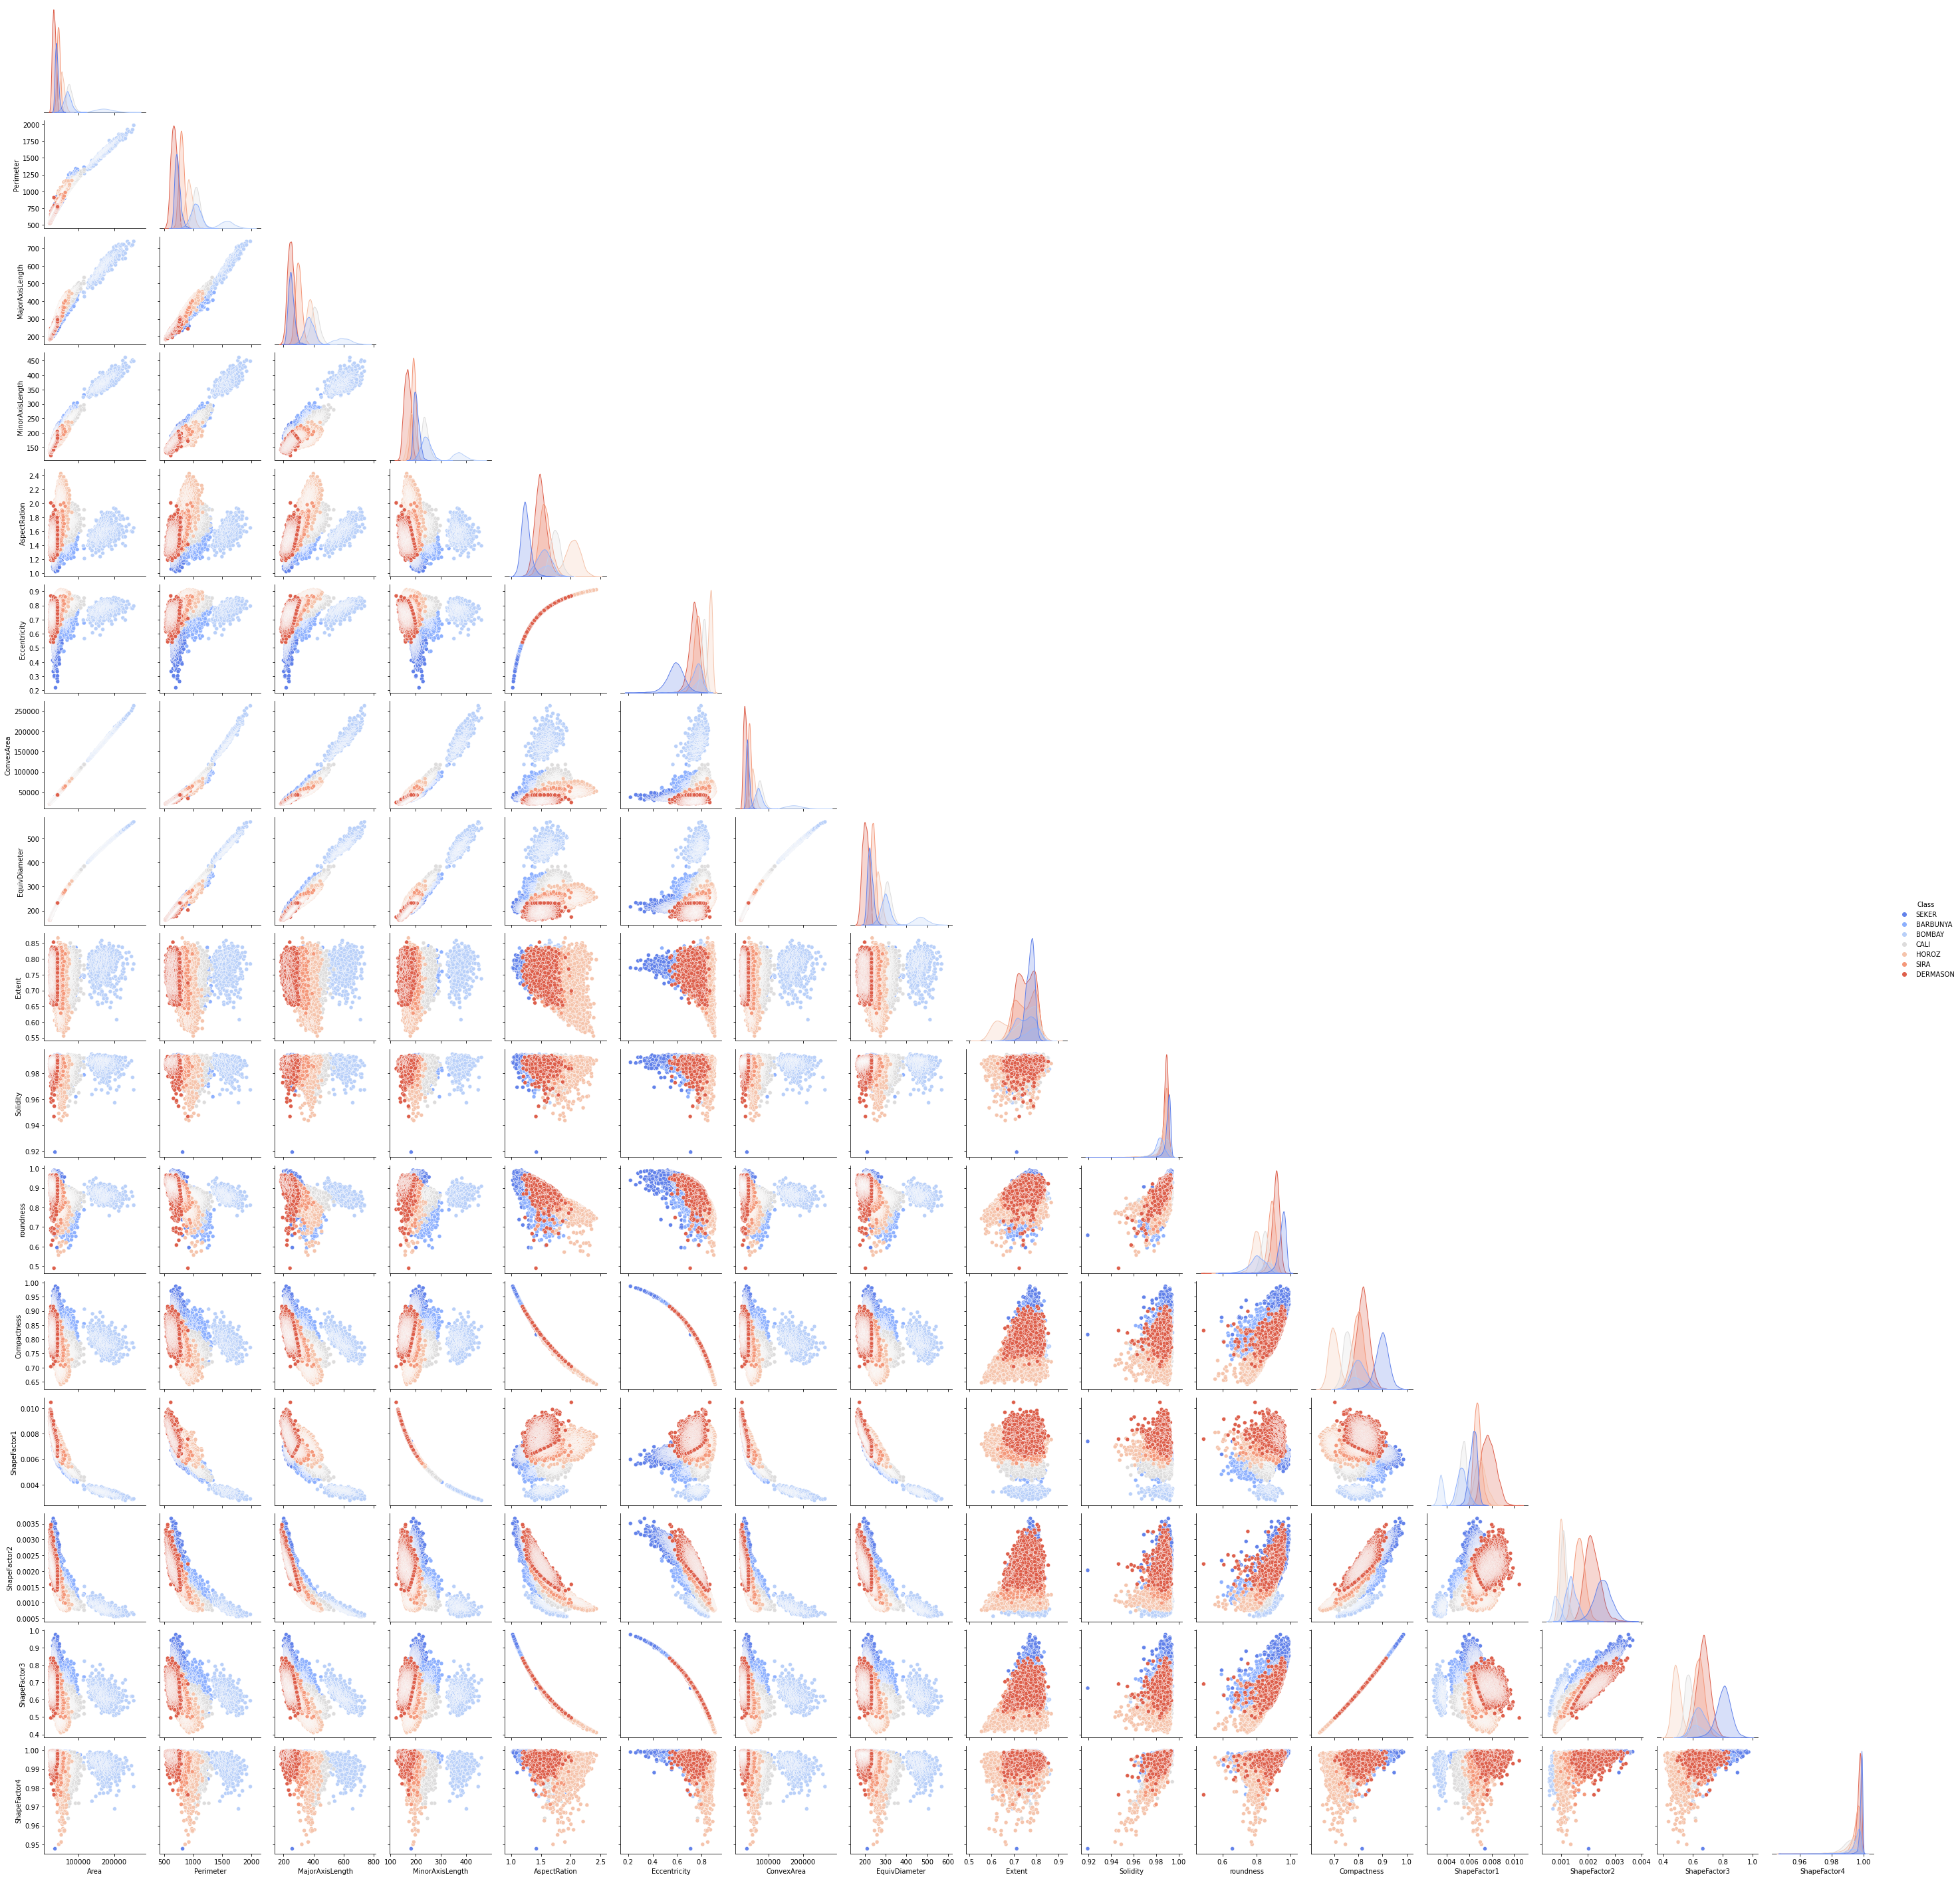

In [36]:
sns.pairplot(df, hue='Class', corner=True, palette='coolwarm')
plt.show()
    

# Train

In [23]:
model = LogisticRegression(penalty='l2', verbose=1, n_jobs=-1)
     

In [24]:
model.get_params().keys()
     

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [25]:
LogisticRegression().solver

'lbfgs'

In [26]:
params = {
    'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'multi_class':['ovr', 'multinomial']
}
     

In [27]:
clf = GridSearchCV(
    model,
    param_grid=params,
    scoring=f1_score,
    cv=5
)


In [28]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, verbose=1),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag']},
             scoring=<function f1_score at 0x000001D056715280>)

In [29]:
model = clf.best_estimator_

In [30]:

y_pred = model.predict(X_test)

# Test

In [31]:
print(f'The model accuracy is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')

The model accuracy is: 91.4%


In [32]:
print(f'The model f1 score is: {np.round(f1_score(y_test, y_pred, average="""weighted"""), decimals=3)*100}%')
     

The model f1 score is: 91.5%


<Figure size 864x864 with 0 Axes>

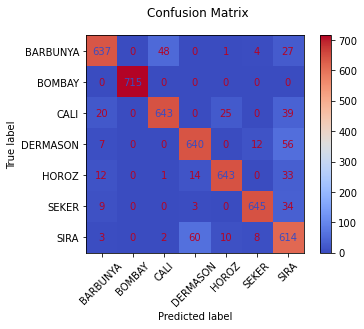

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='coolwarm')
plt.xticks(rotation=45)
plt.suptitle('Confusion Matrix')
plt.show()
     